# Projeto Semestral EFB803

## Turma 2-Barril

> Guilherme de Campos - RA: 20.00089-8

> Leonardo Campos da Costa  -  RA: 20.00786-8

> Luis Guilherme de Souza Munhoz - RA: 20.01937-8

> Enrico Giannobile - RA: 19.00610-0

# Objetivos
 
Analisar o atual mercado de serviços de assinatura de 
jogos,  buscando  entender  a  viabilidade  e  demanda  de  um 
novo serviço do tipo.

# Introdução
 
Atualmente,  o  serviço  de  assinatura  de  jogos,  Xbox 
Game Pass, ultrapassa 25 milhões de assinantes por mês. 
Com isso, achamos interessante analisar tal mercado.

# Procedimento 
 
- Para  a  coleta  dos  dados,  utilizamos  o  serviço  Google 
Forms; 
- Nosso  publico  alvo  são  jogadores  de  vídeo  games 
(gamers); 
- A  partir  do  Google  Forms,  foram  salvas  as  respostas 
em um arquivo csv; 
- O  tratamento  dos  dados  foi  feito  com  Python,  pelo 
Jupyter Notebook no formato de dataframes da 
biblioteca Pandas; 

# Resultados (Análise feita exclusivamente em relação à amostra coletada) 
> Obtenção dos resultados abaixo
 
 


## Importando dados dos .csv(s)
- estes dados foram recolhidos do forms

In [2]:

instalar=False

if(instalar):
    %pip install nbformat 
    %pip install pandas
    %pip install plotly
    %pip install matplotlib
    %pip install seaborn

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns


In [3]:


data=pd.read_csv('Serviços de assinaturas de jogos - Pesquisa .csv')
gringoData=pd.read_csv('INGLES Serviços de assinaturas de jogos.csv')
original=len(data)


## Primeira análise dos dados
- dados brasileiros
- dados estrangeiros


In [4]:
data.head(1)

,Carimbo de data/hora,Qual é sua idade?,Qual é seu gênero?,Qual é sua ocupação?,Qual é seu estado civil?,Qual é seu nível de inglês?,Têm filhos?,Você joga vídeogames?,Quanto(s) jogos você comprou nos últimos 3 meses?,Qual(is) seu(s) gêneros de jogo favorito?,Prefere jogos em qual mídia?,Qual(is) desse(s) critério(s) você considera importante ao comprar um jogo?,Assina algum serviço de assinatura de jogos?,Qual(is)?,Quanto pagaria em um serviço de assinatura de jogos por mês em (R$)?
0,2022/05/12 4:26:30 PM GMT-3,20,Feminino,Estudante,Solteira(o),Fluente,Não,Sim,0.0,Ação/Aventura,Mídia digital,Indiferente,Não,NaN,Não pagaria


In [5]:
gringoData.head(1)

,Carimbo de data/hora,How old are you?,What's your gender?,What's your occupation?,What's your marital status?,What's your level of English?,Do you have kids?,Do you play videogames?,How many games did you bought in the last 3 mounts?,Which are your favorite game genre?,Which type of media do you prefer?,Which criteria do you consider before buying a game?,Do you pay for any game membership?,Which of the following?,How much would you pay for a monthly game membership USD($)?
0,2022/05/15 4:06:23 PM GMT-3,19,Masculine,Student,Single,Fluent,No,Yes,4,Action/Adventure;Race;FPS;Fighting game;RPG,Digital media,Sale;Price;Quality,No,NaN,Wouldn't pay


### Renomeando os titulos

In [6]:
if(data.columns[0]=='Carimbo de data/hora'):
    data.drop("Carimbo de data/hora", axis=1, inplace=True)
    gringoData.drop("Carimbo de data/hora", axis=1, inplace=True)
    print("removido")

removido


In [7]:
titulos=['idade', 
        'genero',
       'ocupacao',
        'estado',# estado civil
       'ingles', # nivel de ingles
       'filhos', # tem filhos
       'joga',   #joga videogames?
       'quant_jogos',#quantos jogos voce comprou?
       'fav_jogos',#titulo favorito                                              (falta traduzir os titulos)
       'midia',     #prefere qual midia de jogos (fisica/digita)
       'importante_jogo',
       'assina', 
       'quais',#o que assina 
       'paga' # quanto ira pagar
       ]



- O tempo e hora da resposta é irrelevante para a pequisa entao iremos removelos

>- Como temos dados em duas linguas iremos traduzir as perguntas e dados para o PORTUGUES


## Traduzindo dados

In [8]:
data.columns=titulos
gringoData.columns=titulos
print(data.columns==gringoData.columns)
data.head(1)
#verifica se os titulos sao iguais

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


,idade,genero,ocupacao,estado,ingles,filhos,joga,quant_jogos,fav_jogos,midia,importante_jogo,assina,quais,paga
0,20,Feminino,Estudante,Solteira(o),Fluente,Não,Sim,0.0,Ação/Aventura,Mídia digital,Indiferente,Não,NaN,Não pagaria


### Analise de respostas para o Dicionário


In [9]:
i=1
while i<8:
    
    print(data[titulos[i]].unique())
    i=i+1

i=9
while i<len(gringoData.columns):
    
    print(data[titulos[i]].unique())
    i=i+1

print("\n")


    


['Feminino' 'Masculino' 'Outros' 'Prefiro não informar']
['Estudante' 'Desempregado' 'Estudante;Desempregado'
 'Estudante;Trabalhador' 'Estudante;ASTROFISICO' 'Autônomo/Freelacer'
 'Trabalhador' 'Advogada' 'Aposentado' 'Empresario' 'Registrador Civil'
 'Aposentado;Trabalhador' 'Empreendedor']
['Solteira(o)' 'Casada(o)' 'Separada(o)' 'Viúva(o)']
['Fluente' 'Intermediário' 'Avançado' 'Básico' 'Nenhum']
['Não' 'Sim']
['Sim' 'Não']
[ 0.  1.  3. nan  4. 12.  9. 19.  2.  5. 11. 16.  6.]
['Mídia digital' 'Mídia física' 'Indiferente' nan]
['Indiferente' 'Desconto;Duração;Preço;Qualidade'
 'Duração;Preço;Qualidade' 'Desconto;Preço;Qualidade' nan 'Qualidade'
 'Desconto;Qualidade' 'Duração;Qualidade' 'Preço;Qualidade'
 'Qualidade;Indiferente' 'Desconto;Duração;Preço;Qualidade;Indiferente'
 'Desconto' 'Desconto;Duração;Qualidade' 'Desconto;Duração' 'Preço'
 'Desconto;Preço']
['Não' 'Sim' nan]
[nan
 'Game Pass;Prime gaming, epic games (não é pago, mas da jogos gratuitos)'
 'Game Pass' 'Game Pass;Pl

In [10]:
i=1
while i<8:
    
    print(gringoData[titulos[i]].unique())
    i=i+1

i=9
while i<len(gringoData.columns):
    
    print(gringoData[titulos[i]].unique())
    i=i+1

['Masculine' 'Feminine']
['Student' 'Employed' 'Unemployed']
['Single' 'Married']
['Fluent' "I'm a native English speaker" 'Advanced']
['No' 'Yes']
['Yes']
[4 3 1 5 2 0]
['Digital media' 'Physical media' 'Indifferent']
['Sale;Price;Quality' 'Price;Quality' 'Duration;Price;Quality' 'Quality'
 'Duration' 'Indifferent']
['No' 'Yes']
[nan 'Playstation Plus'
 'Game Pass;Nintendo Switch Online;Playstation Plus' 'Game Pass'
 'EA Access/Origin Access;Game Pass']
["Wouldn't pay" '1 a 10' '10 a 30' '30 a 50']


### Dicionário

#### Categoria geral - Dicionário


In [11]:
tradutor={
'Masculine':'Masculino',
'Feminine' : 'Feminino',
'Other'    :  'Outro',
'I prefer to not inform'         :  'Prefiro não informar',
'Student'   :   'Estudante',
'Unemployed':   'Desempregado',
'Employed':   'Trabalhador',
'Single'    :  'Solteira(o)',
'Maried'    :   'Casada(o)',
'Fluent'    : "Fluente",
"I'm a native English speaker"  : 'Tenho ingles nativo',
'Advanced'  :   'Avançado',
'No'        :   'Não',
'Yes'       :   'Sim',
'Digital media' :   'Mídia digital',
'Physical media':   'Mídia física',
'Indifferent'   :   'Indiferente',
"Wouldn't pay"  :   'Não pagaria',
'1 a 10'    :   '1 a 10 DOLAR',
'10 a 30'    :   '10 a 30 DOLAR',
'30 a 50'    :   '30 a 50 DOLAR',
'50 a 70'    :   '50 a 70 DOLAR',
'70 a 100'    :   '70 a 100 DOLAR',

}
gringoData=gringoData.replace(tradutor)
gringoData.head(3)

,idade,genero,ocupacao,estado,ingles,filhos,joga,quant_jogos,fav_jogos,midia,importante_jogo,assina,quais,paga
0,19,Masculino,Estudante,Solteira(o),Fluente,Não,Sim,4,Action/Adventure;Race;FPS;Fighting game;RPG,Mídia digital,Sale;Price;Quality,Não,NaN,Não pagaria
1,17,Masculino,Estudante,Solteira(o),Tenho ingles nativo,Não,Sim,3,Strategy;RPG,Mídia digital,Price;Quality,Não,NaN,Não pagaria
2,18,Masculino,Estudante,Solteira(o),Tenho ingles nativo,Não,Sim,1,Action/Adventure;Fighting game,Mídia física,Duration;Price;Quality,Sim,Playstation Plus,1 a 10 DOLAR


#### Categoria jogos - Dicionário

In [12]:
def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text


jogos={
    'Action/Adventure'  : 'Ação/Aventura',
    'Race'              : 'Corrida',
    'Sport'             : 'Esporte',
    'Strategy'          : 'Estrategia',
    'Fighting game'     : 'Luta',
    'Simulation'        : 'Simulação',
    'Horror'            :  'Terror'

}


i=0

while i<len(gringoData):

    txt=gringoData['fav_jogos'][i]
    x = replace_all(txt, jogos)
    gringoData['fav_jogos']=gringoData['fav_jogos'].replace(gringoData['fav_jogos'][i],x)
    i=i+1

gringoData['fav_jogos']



0                    Ação/Aventura;Corrida;FPS;Luta;RPG
1                                        Estrategia;RPG
2                                    Ação/Aventura;Luta
3       Ação/Aventura;Battle Royale;Esporte;Luta;Terror
4                                              FPS;Luta
5                              Ação/Aventura;Estrategia
6     Ação/Aventura;Estrategia;FPS;RPG;Simulação;Ter...
7                   Ação/Aventura;MOBA;Simulação;Terror
8                                                   FPS
9     Ação/Aventura;Battle Royale;Corrida;Estrategia...
10                           Ação/Aventura;FPS;MOBA;RPG
11                         Ação/Aventura;Estrategia;FPS
12                                                  RPG
Name: fav_jogos, dtype: object

In [13]:
criterios={
    'Sale'          :   'Desconto',
    'Duration'      :   'Duração',
    'Price'         :   'Preço',
    'Quality'       :   'Qualidade',
    'Indifferent'   :   'Indiferente',

}


i=0

while i<len(gringoData):

    txt=gringoData['importante_jogo'][i]
    x = replace_all(txt, criterios)
    gringoData['importante_jogo']=gringoData['importante_jogo'].replace(gringoData['importante_jogo'][i],x)
    i=i+1

gringoData['importante_jogo']

0     Desconto;Preço;Qualidade
1              Preço;Qualidade
2      Duração;Preço;Qualidade
3                    Qualidade
4                    Qualidade
5                      Duração
6     Desconto;Preço;Qualidade
7              Preço;Qualidade
8                    Qualidade
9              Preço;Qualidade
10                 Indiferente
11             Preço;Qualidade
12                   Qualidade
Name: importante_jogo, dtype: object

## Editando dados
- Sim = 0
- Nao = 1
- NaN = -1
- adicionar um count

In [14]:
if(len(data)==original):
    data=data.append(gringoData, ignore_index=True)#lembra de excluir o gringoData 

data['quais'] = data['quais'].replace(np.nan, -1)
i=0
while i<len(titulos):
    data[titulos[i]] = data[titulos[i]].replace(np.nan, -1)#arrumar(n_joga aparece)
    data[titulos[i]] = data[titulos[i]].replace('Não', 0)
    data[titulos[i]] = data[titulos[i]].replace('Sim', 1)
    i+=1

#### Adicionando um count para criacao de graficos

In [15]:
count=np.ones(len(data))
data['count']=count
data.tail(3)

,idade,genero,ocupacao,estado,ingles,filhos,joga,quant_jogos,fav_jogos,midia,importante_jogo,assina,quais,paga,count
164,18,Masculino,Desempregado,Solteira(o),Tenho ingles nativo,0,1,4.0,Ação/Aventura;FPS;MOBA;RPG,Indiferente,Indiferente,1,EA Access/Origin Access;Game Pass,30 a 50 DOLAR,1.0
165,14,Masculino,Estudante,Solteira(o),Tenho ingles nativo,0,1,5.0,Ação/Aventura;Estrategia;FPS,Indiferente,Preço;Qualidade,1,Game Pass,1 a 10 DOLAR,1.0
166,19,Masculino,Trabalhador,Solteira(o),Tenho ingles nativo,0,1,0.0,RPG,Mídia digital,Qualidade,1,Game Pass,10 a 30 DOLAR,1.0


## Funções de gráficos

In [16]:
def plot_bar(data,variable,txt):
    varValue=data[variable].value_counts()
    
    plt.figure(figsize = (20,5))
    plt.bar(varValue.index, varValue,color="#A984EA",ec="#7332D6")
    plt.xticks(varValue.index, varValue.index.values)#o que isso siguinifica?? socorro
    plt.ylabel("Frequency")

    plt.title(variable+" "+txt)
    plt.show()


In [17]:
def plot_hist(data,variable,txt):
    varValue=data[variable].value_counts()

    plt.figure(figsize = (9,5))
    plt.hist(data[variable],color="#0ABAB5",bins=20)
    plt.ylabel("Frequency")
    plt.xlabel(variable)
    plt.title(variable+' distribution'+" "+txt)
    plt.show()

## Categorias gerais

In [18]:
categorias_todas=['idade','genero',	'ocupacao',	'estado','ingles','filhos','joga','quant_jogos','fav_jogos','midia','importante_jogo','assina','quais','paga','count']
categorias0=['idade']
categorias1=['genero',	'ocupacao',	'estado'	,'ingles'	,'filhos'	,'joga'	,'quant_jogos'	,	'assina']
categorias2=['genero',	'ocupacao',	'estado'	,'ingles'	,'filhos']

## Ajuste do data final

### Renomeando profissoes

In [19]:

profInvalida={

'Autônomo/Freelacer' : 'Trabalhador',
'Advogada'          : 'Trabalhador',
'Empresario'    : 'Trabalhador',
"Registrador Civil" : 'Trabalhador',
'Empreendedor': 'Trabalhador',
'Estudante;ASTROFISICO': 'Trabalhador'
}

data=data.replace(profInvalida)


### Plotando gráficos

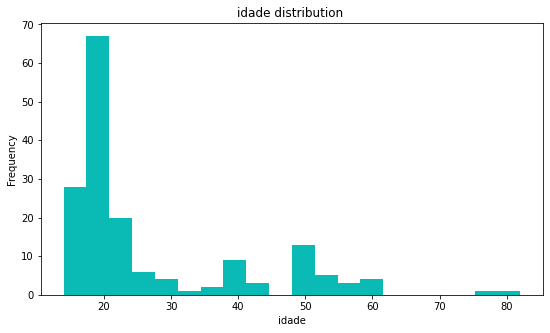

In [20]:
for c in categorias0:
    plot_hist(data,c,"")

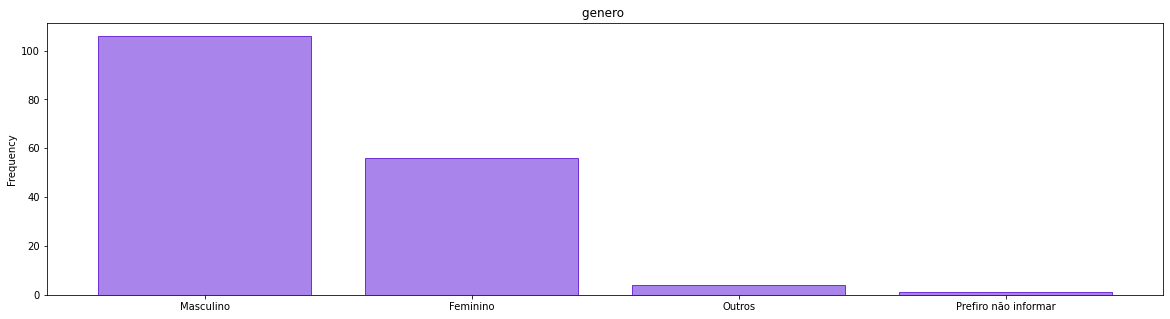

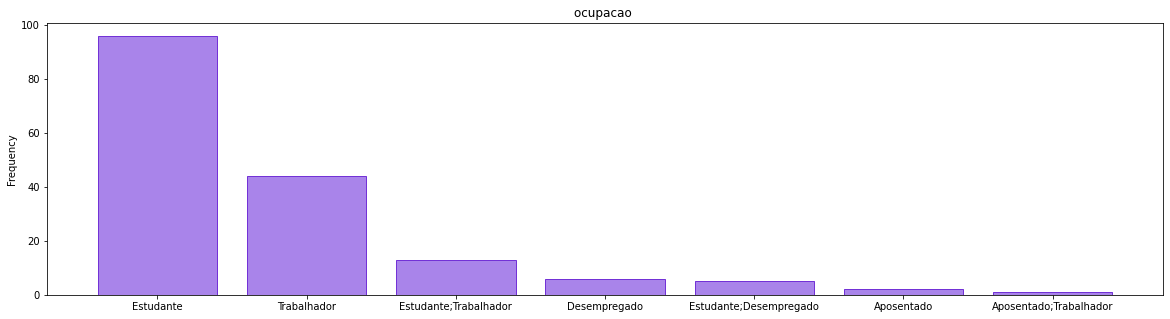

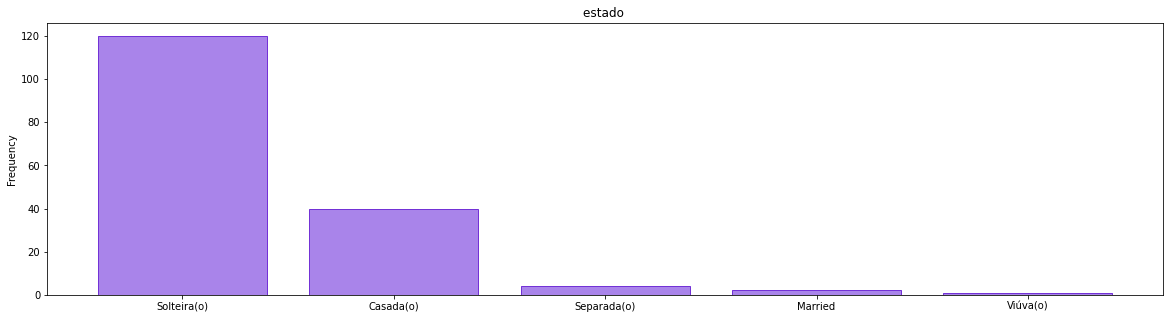

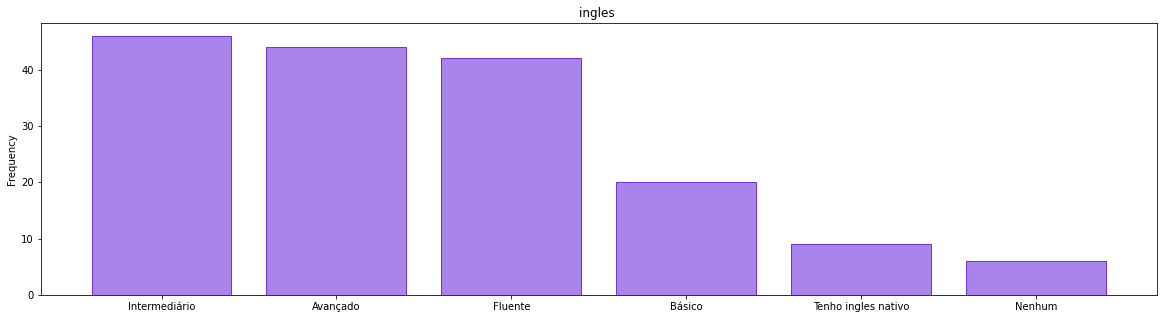

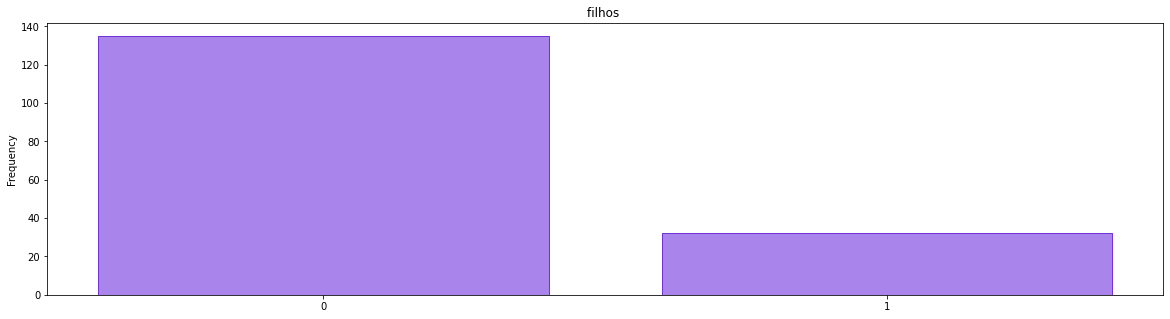

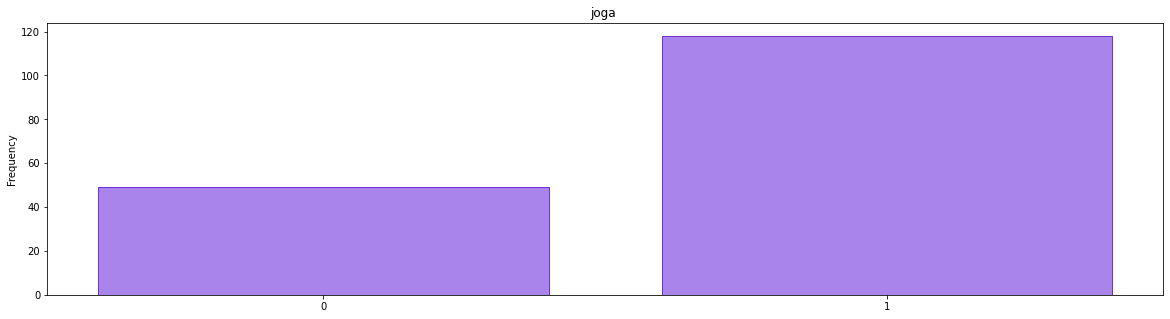

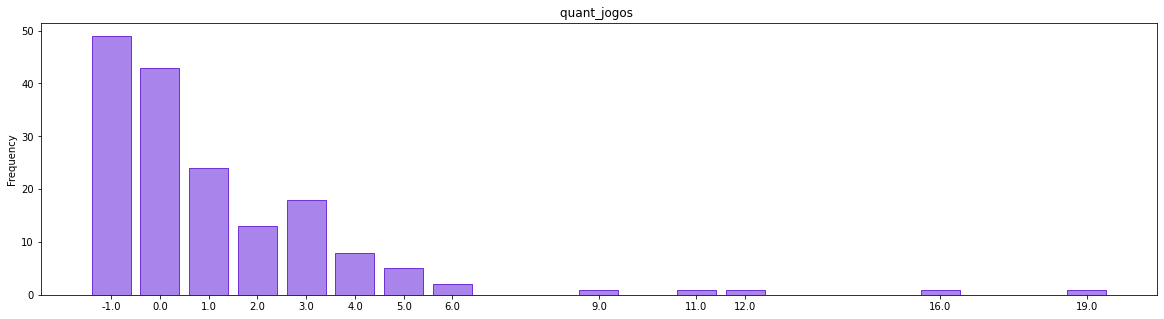

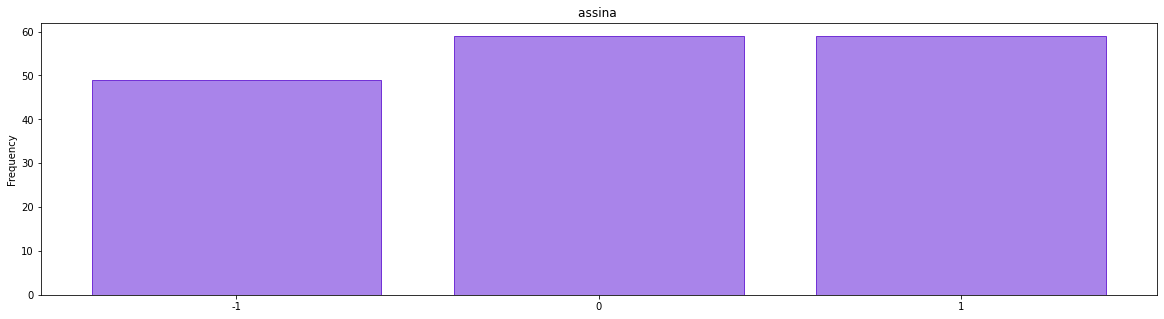

In [21]:
for c in categorias1:
    plot_bar(data,c,"")

In [22]:
idade=px.histogram(data, x='idade',y="count")
joga=px.histogram(data, x="idade", color="joga")   # joga=px.box(data, y="idade", color="joga")
sexo=px.pie(data, values='count', names='genero')

> Segundo o grafico pessoas mais velhas não jogam muito

In [23]:
sexo.show()

In [24]:
joga.show()

### Editando Ocupações

In [25]:
data['ocupacao'].value_counts()

Estudante                 96
Trabalhador               44
Estudante;Trabalhador     13
Desempregado               6
Estudante;Desempregado     5
Aposentado                 2
Aposentado;Trabalhador     1
Name: ocupacao, dtype: int64

In [26]:
# comparando Estudante;Desempregado com Estudante;Trabalhador

array = ["Estudante;Desempregado","Estudante;Trabalhador"]

Estudantes=data.loc[data['ocupacao'].isin(array)] # cria um df so com estudantes;desempregado e estudante;trabalhador

arrayEmprego = ["Estudante","Trabalhador"]

Emprego=data.loc[data['ocupacao'].isin(arrayEmprego)]# cria um df so com estudantes e trabalhador

arrayAposentado = ["Aposentado;Trabalhador","Aposentado"]

Aposentado=data.loc[data['ocupacao'].isin(arrayAposentado)]# cria um df so com aposentado;trabalhador e aposentado


In [27]:
data.head(3)

,idade,genero,ocupacao,estado,ingles,filhos,joga,quant_jogos,fav_jogos,midia,importante_jogo,assina,quais,paga,count
0,20,Feminino,Estudante,Solteira(o),Fluente,0,1,0.0,Ação/Aventura,Mídia digital,Indiferente,0,-1,Não pagaria,1.0
1,20,Masculino,Estudante,Solteira(o),Fluente,0,1,1.0,Ação/Aventura;Estratégia;RPG;Simulação,Mídia física,Desconto;Duração;Preço;Qualidade,0,-1,10 a 30,1.0
2,20,Feminino,Estudante,Solteira(o),Intermediário,0,1,1.0,Ação/Aventura;FPS;Simulação,Indiferente,Duração;Preço;Qualidade,0,-1,10 a 30,1.0


### Vendo a distribuição dos dados

In [28]:
for c in categorias1:

    print(data[c].value_counts(1)) #ver dados bem distribuidos 
    

Masculino               0.634731
Feminino                0.335329
Outros                  0.023952
Prefiro não informar    0.005988
Name: genero, dtype: float64
Estudante                 0.574850
Trabalhador               0.263473
Estudante;Trabalhador     0.077844
Desempregado              0.035928
Estudante;Desempregado    0.029940
Aposentado                0.011976
Aposentado;Trabalhador    0.005988
Name: ocupacao, dtype: float64
Solteira(o)    0.718563
Casada(o)      0.239521
Separada(o)    0.023952
Married        0.011976
Viúva(o)       0.005988
Name: estado, dtype: float64
Intermediário          0.275449
Avançado               0.263473
Fluente                0.251497
Básico                 0.119760
Tenho ingles nativo    0.053892
Nenhum                 0.035928
Name: ingles, dtype: float64
0    0.808383
1    0.191617
Name: filhos, dtype: float64
1    0.706587
0    0.293413
Name: joga, dtype: float64
-1.0     0.293413
 0.0     0.257485
 1.0     0.143713
 3.0     0.107784
 2.0     

## Nível de inglês influencia se a pessoa joga ?
- conclusao (inglês)

In [29]:
tempdf=data.groupby(['ingles','joga']).joga.count().unstack().fillna(0)
tempdf['total']=data['ingles'].value_counts()
tempdf['0 em %']=tempdf[0]/tempdf['total']*100
tempdf['1 em %']=tempdf[1]/tempdf['total']*100
tempdf

joga,0,1,total,0 em %,1 em %
ingles,,,,,
Avançado,15.0,29.0,44,34.090909,65.909091
Básico,11.0,9.0,20,55.000000,45.000000
Fluente,7.0,35.0,42,16.666667,83.333333
Intermediário,14.0,32.0,46,30.434783,69.565217
Nenhum,2.0,4.0,6,33.333333,66.666667
Tenho ingles nativo,0.0,9.0,9,0.000000,100.000000



> quanto mais a pessoa sabe inglês mais provável dela jogar videogame

### Olhando categoria de jogos

In [30]:
tempdf=data['fav_jogos']
test=str(tempdf[1]).split(";")
categorias=[]
contar = []


for string in tempdf:
  escolhas_usuario = str(string).split(";")

  for nova_categoria in escolhas_usuario:
    if(nova_categoria!='-1'):         #exclue o nan
      
      # gambiarra estratégica
      if(nova_categoria == 'Estrategia'):
        nova_categoria = "Estratégia"

      if(not(nova_categoria in categorias)):
        categorias.append(nova_categoria)
        contar.append(1)
      else:
        num=categorias.index(nova_categoria) #descobre a posicao da categoria
        contar[num]+=1
print(categorias)
print(contar)



zip_iterator = zip(categorias, contar)
FavJogos = dict(zip_iterator)

del(FavJogos['OUTER WILDS'])
del(FavJogos['Sandbox'])
del(FavJogos['Jogos hype'])
del(FavJogos['Mundo aberto '])
del(FavJogos['Mostly multiplayer'])
del(FavJogos['ritmo'])
del(FavJogos['Cozinhar'])
del(FavJogos['Visual Novels'])
del(FavJogos['Survival'])
del(FavJogos['Roguelike'])

print(FavJogos)

['Ação/Aventura', 'Estratégia', 'RPG', 'Simulação', 'FPS', 'Battle Royale', 'Corrida', 'Luta', 'Roguelike', 'Esporte', 'MOBA', 'Terror', 'OUTER WILDS', 'Sandbox', 'Jogos hype', 'Mundo aberto ', 'Visual Novels', 'ritmo', 'Cozinhar', 'Mostly multiplayer', 'Survival']
[78, 52, 61, 38, 60, 21, 26, 27, 1, 23, 19, 21, 1, 1, 1, 1, 1, 1, 1, 1, 1]
{'Ação/Aventura': 78, 'Estratégia': 52, 'RPG': 61, 'Simulação': 38, 'FPS': 60, 'Battle Royale': 21, 'Corrida': 26, 'Luta': 27, 'Esporte': 23, 'MOBA': 19, 'Terror': 21}


### Plotando gráficos
- conclusão (quant_jogos)

[Text(0.5, 1.0, 'assinatura')]

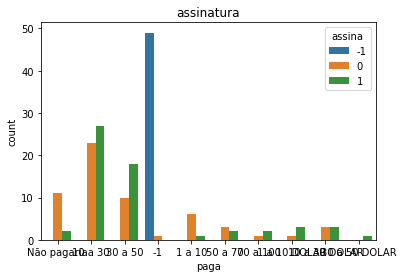

In [31]:
sns.countplot(x='paga', data=data, hue='assina').set(title='assinatura')

[Text(0.5, 1.0, 'ingles_nivel')]

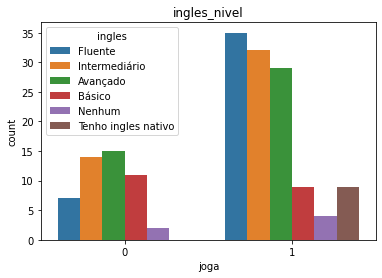

In [32]:

sns.countplot(x='joga', data=data, hue='ingles').set(title='ingles_nivel')


[Text(0.5, 1.0, 'Quant_assina')]

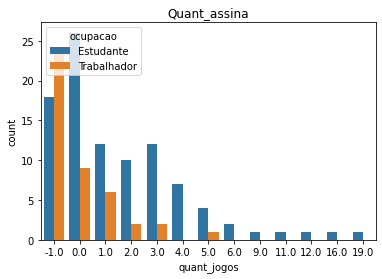

In [33]:

sns.countplot(x='quant_jogos', data=Emprego, hue='ocupacao').set(title='Quant_assina')
#maioria dos consumidores sao estudantes


> Estudantes compram mais jogos

## Separando df para comparação
- > editar
- > conclusão (Gamer x Cringe)
- GAMER
- CRINGE
- Assinante

- - pergunta: olhar para os que gastam mais em jogos -> o que eles mais se importam, costumam assinar ? 
- - pergunta: qual o padrão dos gastos das pessoas
- - obs: devemos já ir anotando as conclusões em outro arquivo

##### Def ler data


In [34]:
def lerCategoria(tempdf):
    CategoriaJogos=[]
    CategoriaJogosValor = []

    for x in tempdf.index:
        strCategoria = str(tempdf[x]).split(";")
        for c in strCategoria:
            if(not(c in CategoriaJogos)):
                CategoriaJogos.append(c)
                CategoriaJogosValor.append(1)
            else:
                CategoriaJogosValor[CategoriaJogos.index(c)] += 1
    total=(sum(CategoriaJogosValor))
    return(CategoriaJogos,CategoriaJogosValor,total)


### Gamer x Cringe

#### Data Gamer

In [35]:

dataGAMER=data
dataGAMER=dataGAMER.drop(dataGAMER[dataGAMER.joga==0].index)
print((dataGAMER['joga'].mean())==1)
dataGAMER.head()


True


,idade,genero,ocupacao,estado,ingles,filhos,joga,quant_jogos,fav_jogos,midia,importante_jogo,assina,quais,paga,count
0,20,Feminino,Estudante,Solteira(o),Fluente,0,1,0.0,Ação/Aventura,Mídia digital,Indiferente,0,-1,Não pagaria,1.0
1,20,Masculino,Estudante,Solteira(o),Fluente,0,1,1.0,Ação/Aventura;Estratégia;RPG;Simulação,Mídia física,Desconto;Duração;Preço;Qualidade,0,-1,10 a 30,1.0
2,20,Feminino,Estudante,Solteira(o),Intermediário,0,1,1.0,Ação/Aventura;FPS;Simulação,Indiferente,Duração;Preço;Qualidade,0,-1,10 a 30,1.0
3,20,Masculino,Estudante,Solteira(o),Fluente,0,1,3.0,Ação/Aventura;Battle Royale;Corrida;Luta;RPG;S...,Indiferente,Desconto;Preço;Qualidade,1,"Game Pass;Prime gaming, epic games (não é pago...",10 a 30,1.0
4,15,Masculino,Estudante,Casada(o),Avançado,1,1,0.0,Estratégia;RPG,Indiferente,Desconto;Preço;Qualidade,1,Game Pass,30 a 50,1.0


#### Data Cringe

In [36]:
dataCRINGE=data
dataCRINGE=dataCRINGE.drop(dataCRINGE[dataCRINGE.joga==1].index)
print((dataCRINGE['joga'].mean())==0)
dataCRINGE.head()

True


,idade,genero,ocupacao,estado,ingles,filhos,joga,quant_jogos,fav_jogos,midia,importante_jogo,assina,quais,paga,count
5,55,Feminino,Desempregado,Casada(o),Intermediário,1,0,-1.0,-1,-1,-1,-1,-1,-1,1.0
6,21,Masculino,Estudante,Solteira(o),Básico,0,0,-1.0,-1,-1,-1,-1,-1,-1,1.0
7,19,Masculino,Estudante,Solteira(o),Intermediário,0,0,-1.0,-1,-1,-1,-1,-1,-1,1.0
34,16,Masculino,Estudante,Solteira(o),Avançado,0,0,-1.0,-1,-1,-1,-1,-1,-1,1.0
35,19,Masculino,Estudante,Solteira(o),Fluente,0,0,-1.0,-1,-1,-1,-1,-1,-1,1.0


#### Plotando Gamer x Cringe

 - idade n_joga = velhos
 - mais homens jogam
 - mais estudantes jogam
 - mais jovens jogam
 - mais velhos n_jogam
 - ingles afeta se a pessoa vai jogar ou nao (melhor mais provavel de jogar) 

In [37]:
print("Quantidade jogam: %6s\nQuantidade não jogam: %s \n" % (len(dataGAMER),len(dataCRINGE)))

Quantidade jogam:    118
Quantidade não jogam: 49 



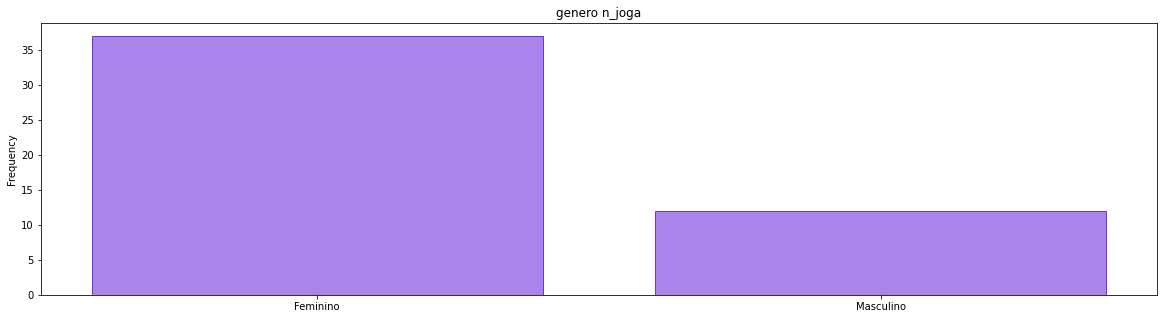

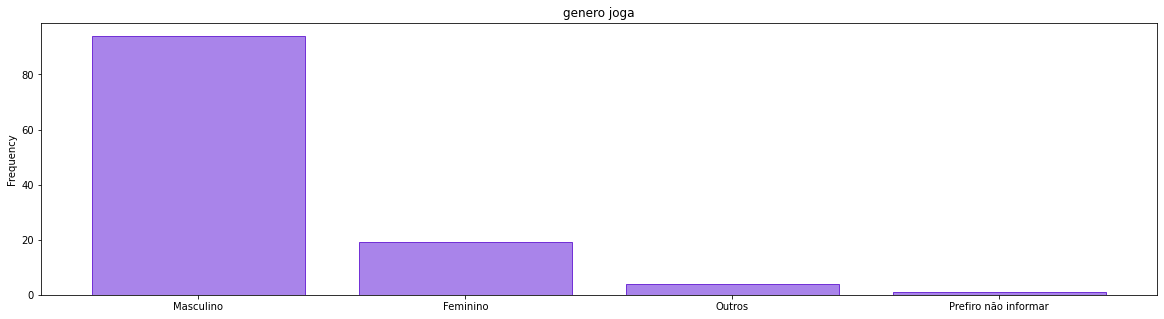

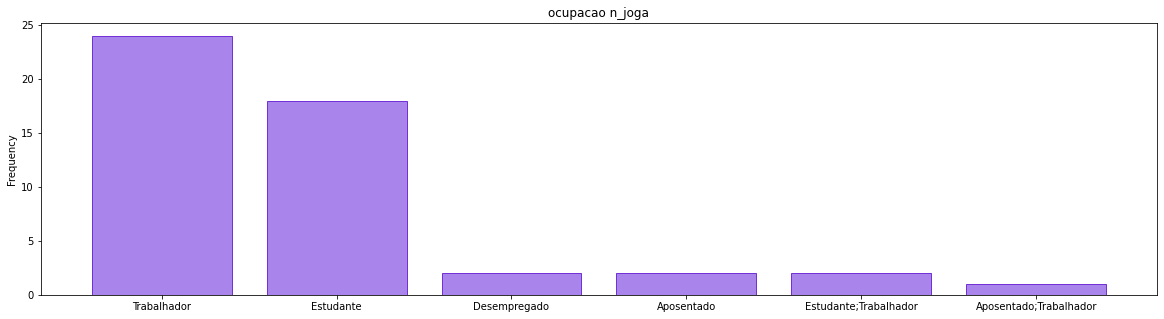

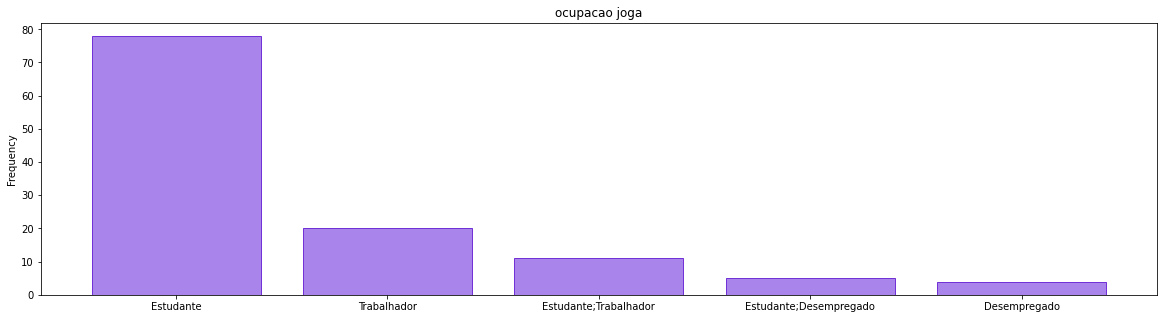

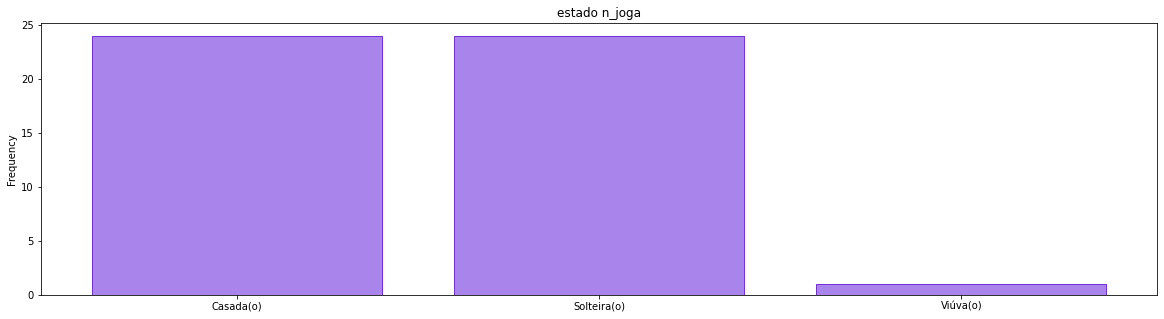

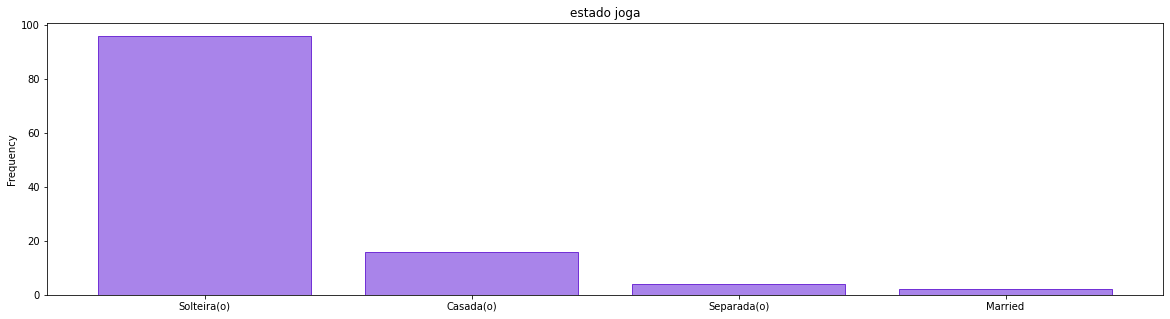

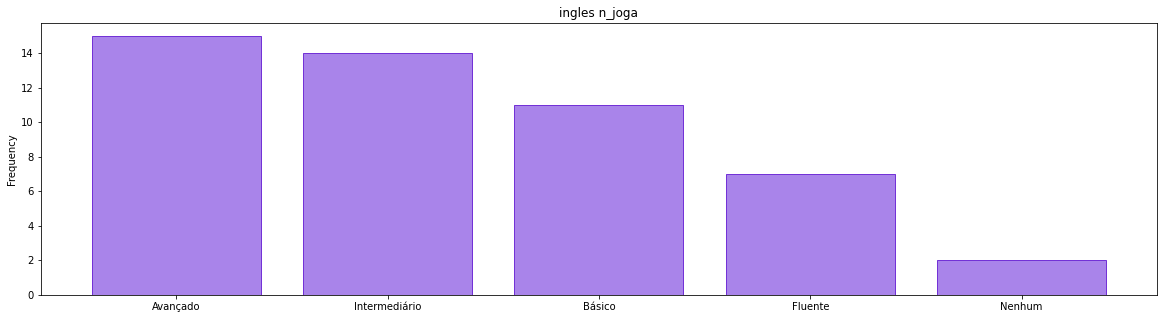

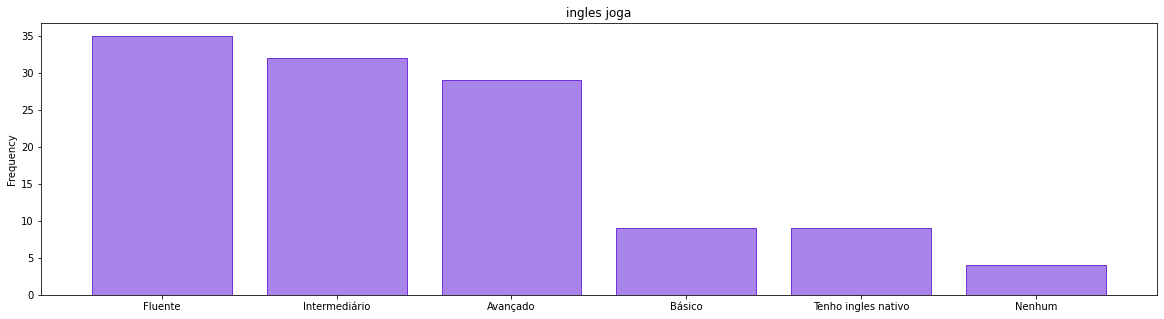

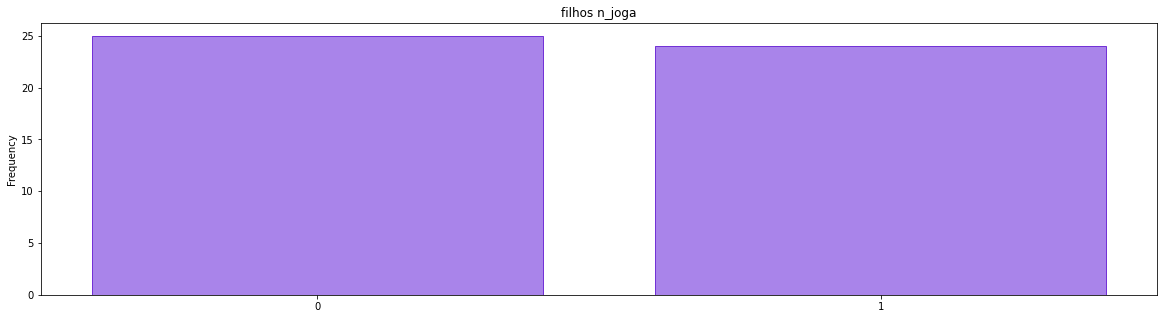

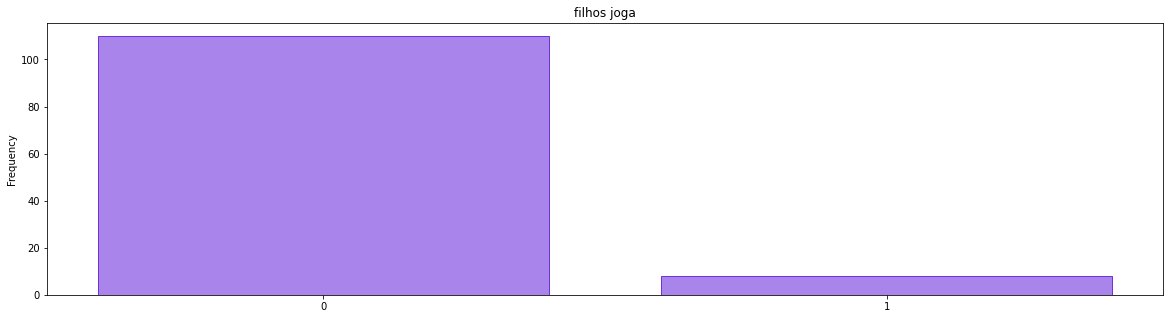

In [38]:
for c in categorias2:
    plot_bar(dataCRINGE,c,"n_joga")
    plot_bar(dataGAMER,c,"joga")
#mais homens jogam
#mais estudantes jogam
#mais jovens jogam
#mais velhos n_jogam
#ingles afeta se a pessoa vai jogar ou nao (melhor mais provavel de jogar)

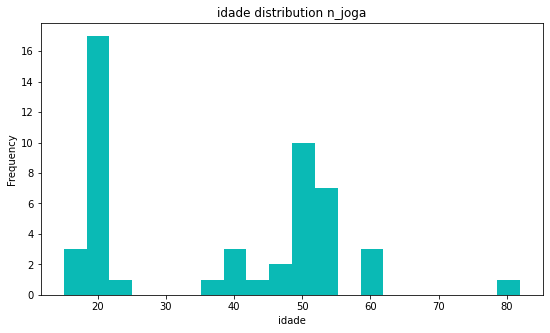

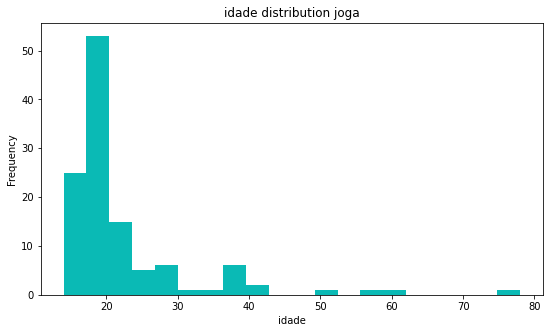

In [39]:
for c in categorias0:
    plot_hist(dataCRINGE,c,"n_joga")
    plot_hist(dataGAMER,c,"joga")

#idade n_joga = velhos

### Assinante x Não Assinante (categoria jogos)

#### Data Assinante

In [40]:
dataAssinantes = data
dataAssinantes = dataAssinantes.drop(dataAssinantes[dataAssinantes.assina == 0].index)
dataAssinantes = dataAssinantes.drop(dataAssinantes[dataAssinantes.quais == -1].index)
dataAssinantes.dropna(subset = ["assina"], inplace=True)

DataAssinamCategoria = dataAssinantes['fav_jogos']
tempdf = DataAssinamCategoria

#### Conta as categorias dos assinantes e transforma em 2 vetores

In [41]:
cat=lerCategoria(tempdf)
CategoriaJogos=cat[0]
CategoriaJogosValor=cat[1]
total=cat[2]

MaioresValores = []
MaioresCategorias = []

for i in range(10):
    
    IndiceMaiorValor = CategoriaJogosValor.index(max(CategoriaJogosValor))
    MaioresValores.append(int(CategoriaJogosValor.pop(IndiceMaiorValor))) 
    MaioresCategorias.append(CategoriaJogos.pop(IndiceMaiorValor))
MaioresValores=np.divide(MaioresValores,total)*100

  ```print("%d %s \n" % (MaioresValores[i],MaioresCategorias[i]))```

#### Plotando Categorias favorita dos Assinantes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



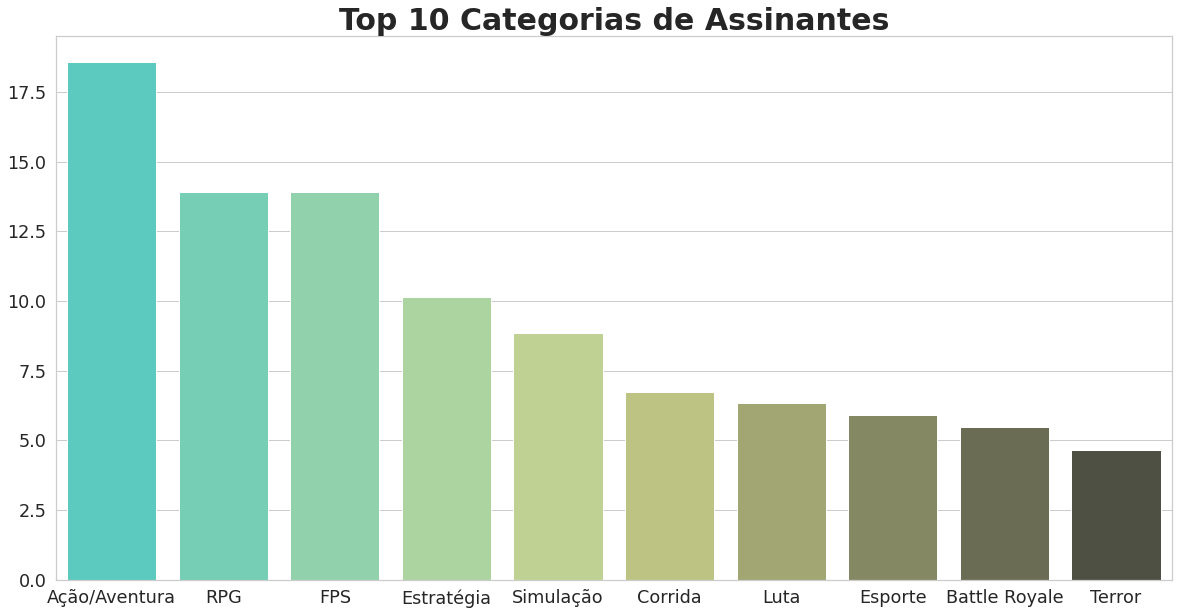

In [42]:
sns.set(rc = {'figure.figsize':(20,10)},font_scale=1.6,style="whitegrid")
plt.title("Top 10 Categorias de Assinantes",weight="bold").set_fontsize('30')
sns.barplot(MaioresCategorias, MaioresValores, palette="rainbow_d")

plt.show()

#### Data Não Assinante

In [43]:


dataBatman = data #nao assinantes jogam
dataBatman = dataBatman.drop(dataBatman[dataBatman.assina == 1].index)
dataBatman = dataBatman.drop(dataBatman[dataBatman.assina == -1].index)
print((dataBatman['assina'].mean())==0)
tempdf=dataBatman['fav_jogos']
dataBatman.head()

True


,idade,genero,ocupacao,estado,ingles,filhos,joga,quant_jogos,fav_jogos,midia,importante_jogo,assina,quais,paga,count
0,20,Feminino,Estudante,Solteira(o),Fluente,0,1,0.0,Ação/Aventura,Mídia digital,Indiferente,0,-1,Não pagaria,1.0
1,20,Masculino,Estudante,Solteira(o),Fluente,0,1,1.0,Ação/Aventura;Estratégia;RPG;Simulação,Mídia física,Desconto;Duração;Preço;Qualidade,0,-1,10 a 30,1.0
2,20,Feminino,Estudante,Solteira(o),Intermediário,0,1,1.0,Ação/Aventura;FPS;Simulação,Indiferente,Duração;Preço;Qualidade,0,-1,10 a 30,1.0
8,20,Masculino,Estudante,Solteira(o),Intermediário,0,1,3.0,Estratégia;RPG;Simulação;Roguelike,Mídia digital,Qualidade,0,-1,10 a 30,1.0
9,21,Masculino,Estudante,Solteira(o),Fluente,0,1,0.0,Estratégia;RPG,Mídia digital,Qualidade,0,-1,10 a 30,1.0


#### Contando as categorias

In [44]:
cat=lerCategoria(tempdf)
CategoriaJogos=cat[0]
CategoriaJogosValor=cat[1]
total=cat[2]

MaioresValores = []
MaioresCategorias = []

for i in range(10):
    
    IndiceMaiorValor = CategoriaJogosValor.index(max(CategoriaJogosValor))
    MaioresValores.append(int(CategoriaJogosValor.pop(IndiceMaiorValor))) 
    MaioresCategorias.append(CategoriaJogos.pop(IndiceMaiorValor))
MaioresValores=np.divide(MaioresValores,total)*100

#### Grafico NAO Assinante

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



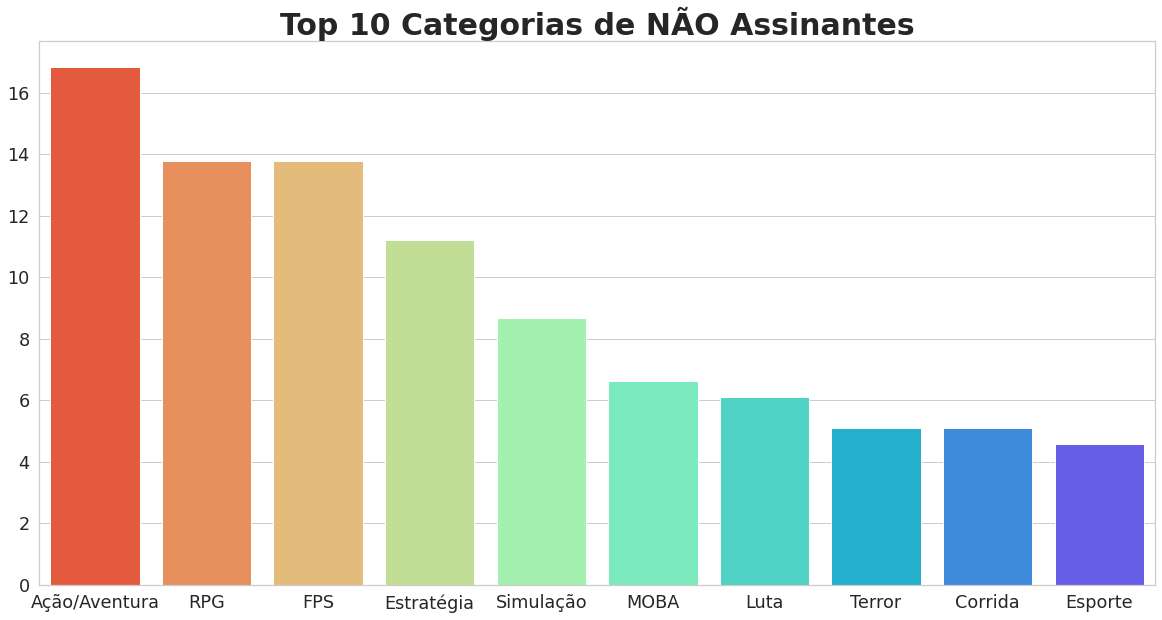

In [45]:
sns.set(rc = {'figure.figsize':(20,10)},font_scale=1.6,style="whitegrid")
plt.title("Top 10 Categorias de NÃO Assinantes",weight="bold").set_fontsize('30')
sns.barplot(MaioresCategorias, MaioresValores, palette="rainbow_r")

plt.show()

Todos gostam + - dos mesmos estilos (5 primeiros sao iguais)

### Assinante x Não Assinante (criterio jogos)


In [46]:



tempdf=dataGAMER[['importante_jogo','assina']]
tempdf.head()
tempdf.groupby(['assina']).importante_jogo.describe()

,count,unique,top,freq
assina,,,,
0,59,12,Desconto;Preço;Qualidade,14
1,59,12,Preço;Qualidade,14


In [47]:
nassina = tempdf.drop(tempdf[tempdf.assina == 1].index)
assina =    tempdf.drop(tempdf[tempdf.assina == 0].index)

In [48]:
cat=lerCategoria(assina['importante_jogo'])
CategoriaJogos=cat[0]
CategoriaJogosValor=cat[1]
total=cat[2]

MaioresValores = []
MaioresCategorias = []

for i in range(5):

    IndiceMaiorValor = CategoriaJogosValor.index(max(CategoriaJogosValor))
    MaioresValores.append(int(CategoriaJogosValor.pop(IndiceMaiorValor))) 
    MaioresCategorias.append(CategoriaJogos.pop(IndiceMaiorValor))
MaioresCategorias
MaioresValores=MaioresValores

In [49]:
catn=lerCategoria(nassina['importante_jogo'])
nCategoriaJogos=catn[0]
nCategoriaJogosValor=catn[1]
ntotal=catn[2]

nMaioresValores = []
nMaioresCategorias = []

for i in range(5):

    nIndiceMaiorValor = nCategoriaJogosValor.index(max(nCategoriaJogosValor))
    nMaioresValores.append(int(nCategoriaJogosValor.pop(nIndiceMaiorValor))) 
    nMaioresCategorias.append(nCategoriaJogos.pop(nIndiceMaiorValor))
nMaioresCategorias
nMaioresValores=nMaioresValores

#### Plot Gráfico
> Conglusao

In [50]:
dataassinaturas = pd.DataFrame({
   'nao assina': nMaioresValores,
   'assina': MaioresValores
   }, index=MaioresCategorias)
dataassinaturas=dataassinaturas.T

> As pessoas presam pela mesmas coisas principalmente qualidade e preço

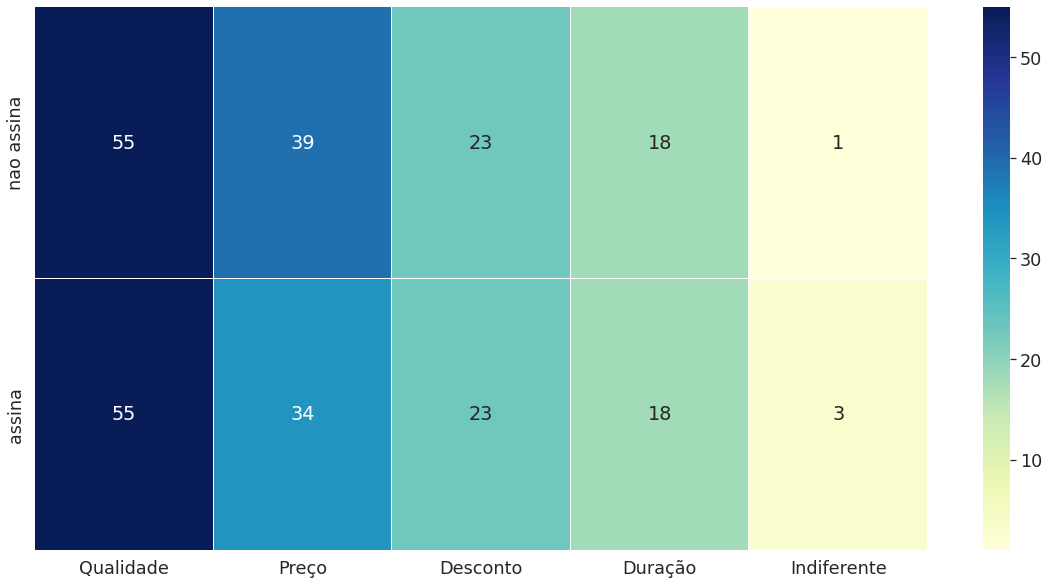

In [51]:
sns.heatmap(dataassinaturas,linewidths=0.1, annot=True,cmap="YlGnBu")

#as pessoas 

### Gastos

In [52]:
data.head(1)

,idade,genero,ocupacao,estado,ingles,filhos,joga,quant_jogos,fav_jogos,midia,importante_jogo,assina,quais,paga,count
0,20,Feminino,Estudante,Solteira(o),Fluente,0,1,0.0,Ação/Aventura,Mídia digital,Indiferente,0,-1,Não pagaria,1.0


In [53]:

contar=dataGAMER.groupby(['paga']).quais.value_counts()
contar.head(len(contar))


paga           quais                                                                  
-1             -1                                                                          1
1 a 10         -1                                                                          6
               Playstation Plus                                                            1
1 a 10 DOLAR   -1                                                                          1
               Game Pass                                                                   1
               Game Pass;Nintendo Switch Online;Playstation Plus                           1
               Playstation Plus                                                            1
10 a 30        -1                                                                         24
               Playstation Plus                                                           11
               Game Pass                                                    

In [54]:
#t=contar[categorias3[1]]
#c=0
#while c < (len(t.index)-1):
    #c+=1
    #print(len(t.index[cS].split(";")))

'''
Não pagaria   
0assinatura = 11 (0.00)->
1assinatura = 1  (16.70)->16.70
2assinatura = 1  (40.00)->40.00
total= 13

1 a 10        
0assinatura = 6 (0.00)->10.00
1assinatura = 1 (16.70)->26.7
total= 7

10 a 30
0assinatura = 24 (0.00)->30.00
1assinatura = 21 (20.00)->50.00
2assinatura =  3 (38.60)->68.60
4assinaruras = 1 (106.70)->136.70
total= 49

30 a 50    
0assinatura = 10 (0.00)->50.00
1assinatura = 13 (22.84)->72.84
2assinatura =  4 (41.67)->91.67
4assinaruras = 1 (98.30)->148.30
total= 28

50 a 70
0assinatura = 3 (0.00)->70.00
1assinatura = 1 (30.00)->100.00
2assinatura = 1 (40.00)->110.00
total= 5

70 a 100 
0assinatura = 1 (0.00)->100
1assinatura = 2 (16.70)->116.70
total= 3



1 a 10 DOLAR
0assinatura = 1
1assinatura = 1
3assinatura = 1
total= 3

10 a 30 DOLAR S
0assinatura = 3
1assinatura = 3
total= 6

30 a 50 DOLAR
2assinatura = 1
total= 1


''';




# Conclusões

-   Com base em nossa pesquisa observamos que um serviço de assinatura 
de jogos potencial deve disponibilizar jogos  das categorias de Ação/Aventura, 
RPG, FPS, Estratégia e Simulação, bem-conceituados no mercado, focando em 
uma  propaganda  voltada  para  o  público  jovem.  Além  disso  identificamos  uma 
grande  oportunidade  no  público  feminino  que  não  está  inserido  no  cenário  de 
games,  e  acreditamos  que  por  meio  da  propaganda  e  patrocínio  de  eventos 
femininos conseguiremos atrair as mesmas a assinarem nossa plataforma.  
-   Pelos dados de gastos vemos que o custo ideal para os nossos serviços 
seria entre 20 e 30 reais (valores comuns no ramo de serviços de assinatura). 
Aparentemente  a  faixa  de  preço  no  exterior  deve  ser  entre  20  e  30  dólares, 
porém não temos dados suficientes para concluir isso. 
 